In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *
from utils import *
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
path_dataset = 'train.csv'
y, X, ids = load_csv_data(path_dataset)
y[np.where(y == -1)] = 0
X[X == -999] = 0

In [3]:
X.shape

(250000, 30)

In [4]:
y.shape

(250000,)

In [5]:
y

array([1., 0., 0., ..., 1., 0., 0.])

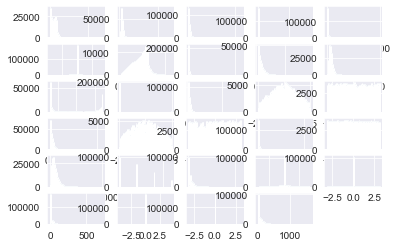

In [6]:
N_feature = X.shape[1]
for i in range(1, N_feature):
    plt.subplot(6,5,i)
    plt.hist(X[:,i], bins = 70)

In [7]:
X_train,X_test,y_train,y_test = split_data(X, y, 0.8)
print("Training data shapes", X_train.shape, y_train.shape)
print("Validation data shapes", X_test.shape, y_test.shape)

Training data shapes (200000, 30) (200000,)
Validation data shapes (50000, 30) (50000,)


<AxesSubplot:>

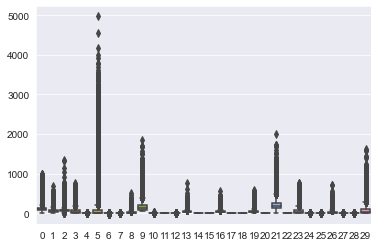

In [8]:
sns.boxplot(X_train)

In [9]:
X_train_ro=X_train.copy()
y_train_ro = y_train.copy()
X_train_ro,y_train_ro=remove_outliers(X_train,y_train)
print("Training data shapes", X_train_ro.shape, y_train_ro.shape)

Training data shapes (198990, 30) (198990,)


<AxesSubplot:>

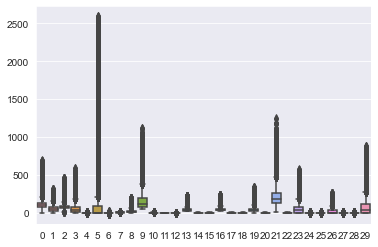

In [10]:
sns.boxplot(X_train_ro)

In [11]:
X_train_ro

array([[ 88.217,  16.589,  60.342, ...,   0.324,   0.47 , 270.564],
       [164.663,  96.601, 113.528, ...,     nan,     nan,   0.   ],
       [104.13 ,   9.265,  68.25 , ...,     nan,     nan,   0.   ],
       ...,
       [115.802,  15.316,  74.884, ...,     nan,     nan,   0.   ],
       [ 97.002,  23.253,  80.52 , ...,  -0.74 ,   1.652, 290.393],
       [104.015,  23.405,  74.765, ...,     nan,     nan,   0.   ]])

In [12]:
from feature_filling import *
X_train_mean = X_train_ro.copy()
X_train_mean = fill_features_with_median(X_train_mean)
X_train_mean.shape

(199155, 30)

In [13]:
X_train_mean

array([[ 8.82170e+01,  1.65890e+01,  6.03420e+01, ...,  3.24000e-01,
         4.70000e-01,  2.70564e+02],
       [ 1.64663e+02,  9.66010e+01,  1.13528e+02, ..., -1.10000e-02,
         3.00000e-03,  0.00000e+00],
       [ 1.04130e+02,  9.26500e+00,  6.82500e+01, ..., -1.10000e-02,
         3.00000e-03,  0.00000e+00],
       ...,
       [ 1.15802e+02,  1.53160e+01,  7.48840e+01, ..., -1.10000e-02,
         3.00000e-03,  0.00000e+00],
       [ 9.70020e+01,  2.32530e+01,  8.05200e+01, ..., -7.40000e-01,
         1.65200e+00,  2.90393e+02],
       [ 1.04015e+02,  2.34050e+01,  7.47650e+01, ..., -1.10000e-02,
         3.00000e-03,  0.00000e+00]])

In [11]:
#X_train = fill_features_with_median(X_train)
X_train, _, _ = standardize(X_train)
X_train.shape

(200000, 30)

In [12]:
X_train_ro, _, _ = standardize(X_train_ro)
X_train_ro.shape

(198990, 30)

In [15]:
X_train_mean, _, _ = standardize(X_train_mean)
X_train_mean.shape

(199155, 30)

In [30]:
Columns_With_Missing_Features, Feature_Median = calculate_feature_medians(X_train)
X_test_mean = fill_features_with_median(X_test,Columns_With_Missing_Features, Feature_Median)

In [13]:
from implementations import *
weights, loss = logistic_regression(y_train, X_train, np.zeros(X_train.shape[1]), max_iters=3000, gamma=0.1)
loss

0.5237328087295677

In [14]:
compute_score(y_test,X_test,weights)

/Users/alexzhu/PycharmProjects/ml-project-1-zml/utils.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.72982

In [16]:
weights, loss = logistic_regression(y_train_ro, X_train_ro, np.zeros(X_train_ro.shape[1]), max_iters=3000, gamma=0.1)
loss

0.5206387075271109

In [18]:
compute_score(y_test,X_test,weights)

/Users/alexzhu/PycharmProjects/ml-project-1-zml/utils.py:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.72638

In [19]:
weights, loss = reg_logistic_regression(y_train, X_train, lambda_=0.01,initial_w=np.zeros(X_train.shape[1]), max_iters=2000, gamma=0.01)
loss

0.6085823266354224

In [20]:
compute_score(y_test,X_test,weights)

0.6809

In [ ]:
weights, loss = reg_logistic_regression(y_train_ro, X_train_mean, lambda_=0.01,initial_w=np.zeros(X_train.shape[1]), max_iters=1000, gamma=0.03)
loss

In [ ]:
compute_score(y_test,X_test_mean,weights)

In [ ]:
X_b_train = np.hstack((X_train_ro,np.ones((X_train_ro.shape[0],1))))
X_b_test = np.hstack((X_test,np.ones((X_test.shape[0],1))))

In [ ]:
weights, loss = logistic_regression(y_train_ro, X_b_train, np.zeros(X_b_train.shape[1]), max_iters=1000, gamma=0.01)
loss

In [ ]:
compute_score(y_test,X_b_test,weights)

In [ ]:
Phi_train = np.hstack((X_train_ro,X_train_ro**2))
Phi_test = np.hstack((X_test,X_test**2))
Phi_b_train = np.hstack((Phi_train,np.ones((Phi_train.shape[0],1))))
Phi_b_test = np.hstack((Phi_test,np.ones((Phi_test.shape[0],1))))
print(Phi_b_train.shape)
print(Phi_b_test.shape)

In [ ]:
weights, loss = logistic_regression(y_train_ro, Phi_b_train, np.random.random(Phi_b_train.shape[1]), max_iters=1000, gamma=0.01)
loss

# SKlearn Test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.score(X_train, y_train))
accuracy_score(y_test, clf.predict(X_test))

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_ro, y_train_ro)
print(clf.score(X_train_ro, y_train_ro))
accuracy_score(y_test, clf.predict(X_test))

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(3,interaction_only=False)
# # poly = PolynomialFeatures(2,interaction_only=True)
# X_poly=poly.fit_transform(X_train_ro)
# clf = LogisticRegression(random_state=0).fit(X_poly, y_train_ro)
# print(clf.score(X_poly, y_train_ro))
# accuracy_score(y_test, clf.predict(poly.fit_transform(X_test)))

# Test Missing Values

In [ ]:
X[X == -999] = np.NaN
Columns_With_All_Features = np.where(np.all(~np.isnan(X), axis=1))[0]
Columns_With_All_Features

In [ ]:
X_full = X[Columns_With_All_Features]
y_full = y[Columns_With_All_Features]
print(X_full.shape)
print(y_full.shape)

In [ ]:
X_train,X_test,y_train,y_test = split_data(X_full, y_full, 0.8)
print("Training data shapes", X_train.shape, y_train.shape)
print("Validation data shapes", X_test.shape, y_test.shape)

In [ ]:
from utils import *
X_train_ro=X_train.copy()
y_train_ro = y_train.copy()
X_train_ro,y_train_ro=remove_outliers(X_train,y_train)
print("Training data shapes", X_train_ro.shape, y_train_ro.shape)

In [ ]:
X_train, _, _ = standardize(X_train)
X_train.shape

In [ ]:
X_train_ro, _, _ = standardize(X_train_ro)
X_train_ro.shape

In [ ]:
weights, loss = logistic_regression(y_train, X_train, np.zeros(X_train.shape[1]), max_iters=1000, gamma=0.03)
loss

In [ ]:
compute_score(y_test,X_test,weights)

In [ ]:
weights, loss = logistic_regression(y_train_ro, X_train_ro, np.zeros(X_train.shape[1]), max_iters=1000, gamma=0.01)
print(loss)
compute_score(y_test,X_test,weights)